# Project 2 (TDS) : Books Tags Ratings Bookmarks Analysis

https://docs.google.com/document/u/1/d/e/2PACX-1vSQmM5fHa2rVFl_N89rpbmopb8OcsR7m6Df-4J-lUGs-mcS1ICBroRT6g_JWwe-UT1V4snIryWydu0h/pub 

- How many books do not have an original title [books.csv] ? N
- How many unique books are present in the dataset ? Evaluate based on the 'book_id' [books.csv]  N
- How many unique users are present in the dataset [ratings.csv] ? N
- Which book (title) has the maximum number of ratings based on ‘work_ratings_count’  [books.csv] ? S
- Which tag_id  is the most frequently used ie. mapped with the highest number of books [book_tags.csv]  ? (In case of more than one tag, mention the tag id with the least numerical value) N

In [239]:
import pandas as pd

In [240]:
books = pd.read_csv('data/books.csv')
ratings = pd.read_csv('data/ratings.csv')
book_tags = pd.read_csv('data/book_tags.csv')
toread = pd.read_csv('data/toread.csv')

In [241]:
books.head(5)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,150,4989,4989,1041558,80,312353766,9.780312e+12,Anita Diamant,1997.0,The Red Tent,...,449217,17234,9470,19616,67878,146178,206075,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,0
1,233,9712,9712,3285349,347,140003468X,9.781400e+12,"Gabriel García Márquez, Edith Grossman",1985.0,El amor en los tiempos del cólera,...,323461,15246,11450,23825,65668,110544,111974,https://images.gr-assets.com/books/1327124987m...,https://images.gr-assets.com/books/1327124987s...,0
2,304,227711,227711,1191096,52,60987561,9.780061e+12,Wally Lamb,1998.0,I Know This Much Is True,...,257608,7775,4430,9972,39899,86909,116398,https://images.gr-assets.com/books/1373532198m...,https://images.gr-assets.com/books/1373532198s...,0
3,326,32234,32234,1223333,96,316182540,9.780316e+12,Janet Fitch,1999.0,White Oleander,...,254276,5960,3765,13598,60133,94893,81887,https://images.gr-assets.com/books/1501159524m...,https://images.gr-assets.com/books/1501159524s...,0
4,383,1241,1241,3140930,69,307276902,9.780307e+12,James Frey,2003.0,A Million Little Pieces,...,189931,10857,9619,18950,51504,63727,46131,https://images.gr-assets.com/books/1483206985m...,https://images.gr-assets.com/books/1483206985s...,0


## How many books do not have an original title [books.csv] ? N

In [242]:
books.original_title.isna().sum()

45

In [243]:
dropped_book_rows = books[books.original_title.isna()][['goodreads_book_id','best_book_id','book_id']]
books=books[~books.original_title.isna()]

In [244]:
# clean from ratings, book_tags, toread
ratings=ratings[~ratings.book_id.isin(dropped_book_rows.book_id)]
book_tags=book_tags[~book_tags.goodreads_book_id.isin(dropped_book_rows.goodreads_book_id)]
toread=toread[~toread.book_id.isin(dropped_book_rows.book_id)]

## How many unique books are present in the dataset ? Evaluate based on the 'book_id' [books.csv] N

In [245]:
books.goodreads_book_id.unique().shape[0]

502

## How many unique users are present in the dataset [ratings.csv] ? N

In [246]:
ratings.head(2)

,user_id,book_id,rating
1,9,2193,2
2,9,1301,2


In [247]:
ratings.user_id.unique().shape[0]

41511

## Which book (title) has the maximum number of ratings based on ‘work_ratings_count’  [books.csv] ? S

In [248]:
max_ratings_count = books.work_ratings_count.max()
books[books.work_ratings_count == max_ratings_count].reset_index()['title'][0]

'The Red Tent'

## Which tag_id is the most frequently used ie. mapped with the highest number of books [book_tags.csv] ? (In case of more than one tag, mention the tag id with the least numerical value) N

In [249]:
book_tags.head(2)

,goodreads_book_id,tag_id,count
100,264,7457,2632
101,264,11743,1053


In [250]:
book_tags[['tag_id','count']].groupby('tag_id').sum().reset_index().sort_values(['count'], ascending=False)[:1]['tag_id'].values[0]

30574

- Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv]  ? S
- Which book (goodreads_book_id) is marked as to-read by most users [books.csv,toread.csv] ? N
- Which is the least used tag, i.e. mapped with the lowest number of books [book_tags.csv]   ? (In case of more than one tag, mention the tag id with the least numerical value)  N
- Which book (title) has the minimum ‘average_rating’  [books.csv] ? S
- Which book (goodreads_book_id) has the least number of count of tags given by the user  [book_tags.csv,books.csv] ? N
- How many tags are there in the dataset [book_tags.csv]  ? N
- What is the average rating of all the books in the dataset based on ‘average_rating’  [books.csv]  ? N
- Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’ [books.csv] ? N
- Predict sentiment using Textblob. How many positive titles (title) are there [books.csv] ? (cut-off >0) N
(3 marks)

## Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv]  ? S

In [251]:
books.head(1)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,150,4989,4989,1041558,80,312353766,9.780312e+12,Anita Diamant,1997.0,The Red Tent,...,449217,17234,9470,19616,67878,146178,206075,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,0


In [252]:
book_tags.head(1)

,goodreads_book_id,tag_id,count
100,264,7457,2632


In [253]:
set(books.columns) & set(book_tags.columns)

{'goodreads_book_id'}

In [254]:
books_and_tags = books.join(book_tags, on='goodreads_book_id', how='inner', lsuffix='_b', rsuffix='_bt', sort=False)
books_and_tags.head(1)

,goodreads_book_id,book_id,goodreads_book_id_b,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,...,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish,goodreads_book_id_bt,tag_id,count
0,4989,150,4989,4989,1041558,80,312353766,9.780312e+12,Anita Diamant,1997.0,...,19616,67878,146178,206075,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,0,7354,30766,19


In [255]:
books_and_tags.columns

Index(['goodreads_book_id', 'book_id', 'goodreads_book_id_b', 'best_book_id',
       'work_id', 'books_count', 'isbn', 'isbn13', 'authors',
       'original_publication_year', 'original_title', 'title', 'language_code',
       'average_rating', 'ratings_count', 'work_ratings_count',
       'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3',
       'ratings_4', 'ratings_5', 'image_url', 'small_image_url', 'NonEnglish',
       'goodreads_book_id_bt', 'tag_id', 'count'],
      dtype='object')

In [256]:
books_and_tags[books_and_tags.goodreads_book_id_b==books_and_tags[['goodreads_book_id_b','count']].groupby('goodreads_book_id_b').sum().reset_index().sort_values(['count'], ascending=False)[:1]['goodreads_book_id_b'].values[0]]['title']

366    The Golden Notebook
Name: title, dtype: object

In [257]:
max_tag = books_and_tags['count'].max()
books_and_tags[books_and_tags['count'] == max_tag].reset_index()['title'][0]

'The Golden Notebook'

## Which book (goodreads_book_id) is marked as to-read by most users [books.csv,toread.csv] ? N

In [258]:
most_toread_bookid = toread[['user_id','book_id']].groupby('book_id').size().sort_values(ascending=False).index[0]
books[books.book_id == most_toread_bookid].reset_index()['goodreads_book_id'][0]

9712

## Which is the least used tag, i.e. mapped with the lowest number of books [book_tags.csv]   ? (In case of more than one tag, mention the tag id with the least numerical value)  N

In [259]:
book_tags[['tag_id','count']].groupby('tag_id').sum().reset_index().sort_values(['count','tag_id'], ascending=True)[:1]['tag_id'].values[0]

68

In [260]:
min_count = book_tags['count'].min()
book_tags[book_tags['count']==min_count].tag_id.min()

68

## Which book (title) has the minimum ‘average_rating’  [books.csv] ? S

In [261]:
books[books.average_rating == books.average_rating.min()].reset_index()['title'][0]

"The Emperor's Children"

## Which book (goodreads_book_id) has the least number of count of tags given by the user [book_tags.csv,books.csv] ? N

In [262]:
books_and_tags.isna().sum()

goodreads_book_id             0
book_id                       0
goodreads_book_id_b           0
best_book_id                  0
work_id                       0
books_count                   0
isbn                          0
isbn13                        0
authors                       0
original_publication_year     0
original_title                0
title                         0
language_code                26
average_rating                0
ratings_count                 0
work_ratings_count            0
work_text_reviews_count       0
ratings_1                     0
ratings_2                     0
ratings_3                     0
ratings_4                     0
ratings_5                     0
image_url                     0
small_image_url               0
NonEnglish                    0
goodreads_book_id_bt          0
tag_id                        0
count                         0
dtype: int64

In [263]:
books_and_tags[['goodreads_book_id_b','count']].groupby('goodreads_book_id_b').sum().reset_index().sort_values(['count','goodreads_book_id_b'], ascending=True)

,goodreads_book_id_b,count
5,1990,2
25,5084,2
48,7579,2
51,8155,2
91,15096,2
...,...,...
2,706,215
37,5204,220
57,9503,336
52,8600,3299


In [264]:
## sum and sort
# book_tags['a_bsum'] = df.groupby('A')['B'].transform(sum)
# df.sort(['a_bsum','C'], ascending=[True, False]).drop('a_bsum', axis=1)

## How many tags are there in the dataset [book_tags.csv] ? N

In [265]:
book_tags.tag_id.unique().shape[0]

5791

In [266]:
book_tags.isna().sum()

goodreads_book_id    0
tag_id               0
count                0
dtype: int64

## What is the average rating of all the books in the dataset based on ‘average_rating’  [books.csv]  ? N

In [267]:
books.fillna(0).average_rating.mean()

3.8631075697211155

## Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’ [books.csv] ? N

In [268]:
books[books.original_publication_year == 2000].shape[0]

11

## Predict sentiment using Textblob. How many positive titles (title) are there [books.csv] ? (cut-off >0) N

In [269]:
books.title

0                                           The Red Tent
1                            Love in the Time of Cholera
2                               I Know This Much Is True
3                                         White Oleander
4                                A Million Little Pieces
                             ...                        
541    The Discoverers: A History of Man's Search to ...
542                           A Coney Island of the Mind
543                                       Thirteen Moons
544                                          Big Brother
545               The Girl with No Shadow (Chocolat, #2)
Name: title, Length: 502, dtype: object

In [270]:
pip install textblob

In [271]:
from textblob import TextBlob

books['polarity'] = books.title.map(lambda x: TextBlob(x).sentiment.polarity)

In [272]:
books[books.polarity > 0].shape[0]

62

### Checking negative polarity titles

In [273]:
books[books.polarity<=0][['title','polarity']].head(10)

,title,polarity
0,The Red Tent,0.0000
3,White Oleander,0.0000
4,A Million Little Pieces,-0.1875
5,Little Bee,-0.1875
8,Insomnia,0.0000
9,The Shipping News,0.0000
10,America (The Book): A Citizen's Guide to Democ...,0.0000
11,We Were the Mulvaneys,0.0000
12,Stones from the River,0.0000
13,The Birth of Venus,0.0000


## Graph Questions

- Plot a bar chart in Flourish with top 20 unique tags  in descending order of ‘user records’ (the number of users tagged the given tag_id with the goodreads_book_id) [book_tags.csv] and share the published link.
(2 marks)


In [274]:
top20_tags = book_tags.sort_values(by='count',ascending=False)[:20]

In [275]:
top20_tags['goodread_book_id:tag_id']=top20_tags['goodreads_book_id'].map(str, na_action=None) + ' : '+top20_tags['tag_id'].map(str, na_action=None)

In [276]:
top20_tags[['goodread_book_id:tag_id','count']]

,goodread_book_id:tag_id,count
49400,17333230 : 30574,95761
10700,17184 : 30574,85003
7400,11366 : 30574,57674
8700,13912 : 30574,55760
51300,18505784 : 30574,51590
48600,16138688 : 30574,51112
5500,8600 : 30574,47823
27600,227711 : 30574,45736
50700,18170143 : 30574,44538
37500,3147367 : 30574,42797


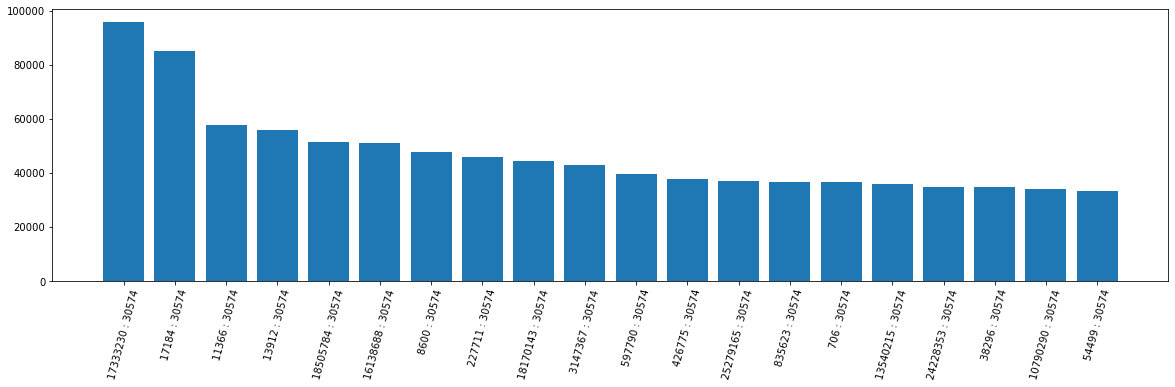

In [277]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.bar(top20_tags['goodread_book_id:tag_id'],top20_tags['count'])
plt.xticks(rotation=75)
plt.show()

In [278]:
top20_tags[['goodread_book_id:tag_id','count']].to_csv('data/top_20_tags.csv')

View the barchart at flourish.studio : https://public.flourish.studio/visualisation/10684191/


- Bucket the average_rating of books into 6 buckets [0,1,2,3,4,5] with 0.5 decimal rounding (eg: average_rating 3.5 to 4.4 will fall in bucket 4). Plot bar graph in Flourish to show total number of books in each rating bucket. [books.csv] and share the published link.
(2 marks)

<AxesSubplot:>

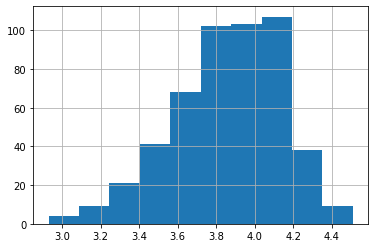

In [279]:
books.average_rating.hist()

In [280]:
books['rating_bin']=pd.cut(books.average_rating,[0,1.5,2.5,3.5,4.5,5.0],right=False).astype(str)

In [281]:
books.rating_bin.unique()

array(['[3.5, 4.5)', '[2.5, 3.5)', '[4.5, 5.0)'], dtype=object)

<AxesSubplot:xlabel='rating_bin'>

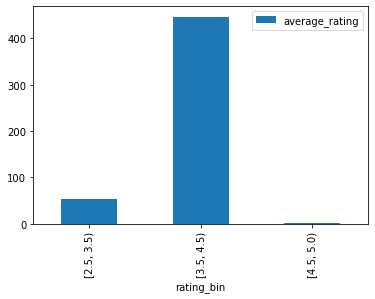

In [282]:
books[['rating_bin','average_rating']].groupby('rating_bin').count().plot(kind='bar')

In [283]:
res=books[['rating_bin','average_rating']].groupby('rating_bin').count().reset_index()
res.columns=['rating_bin','count']

In [284]:
res.to_csv('data/rating_bin_count.csv')

Check the barchart @  https://public.flourish.studio/visualisation/1068422